
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

## 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))
    
    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image
        
    return image_array, image_label

In [3]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

In [4]:
## load dataset here
df = pd.read_csv("C:/Users/Admin/Desktop/Nhập môn máy học cuối kì/ML-Mini-Project/notebooks/icml_face_data.csv")
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


The ```emotion``` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [5]:
## parsing data here
images, labels = parse_data(df)


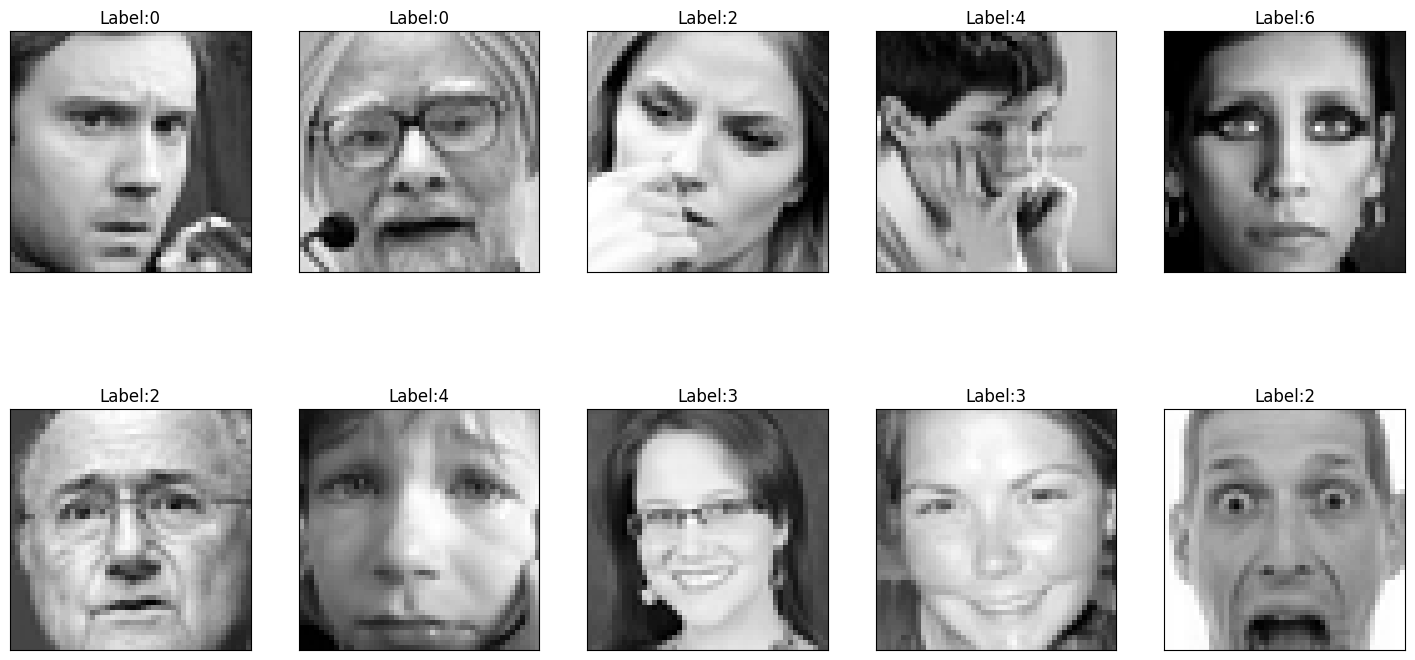

In [6]:
## showing images here
show_img(images, labels)

## 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

Question 1: Can you visualize the data projected onto two principal components? (2 points)

In [7]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
images = images.reshape(len(images), -1)
pca.fit(images) ## modify images' array to the appropriate shape

PCA(n_components=2)

In [8]:
## transform for visualizing here
images_pca=pca.transform(images) ## modify images' array to the appropriate shape
images_pca.shape

(35887, 2)

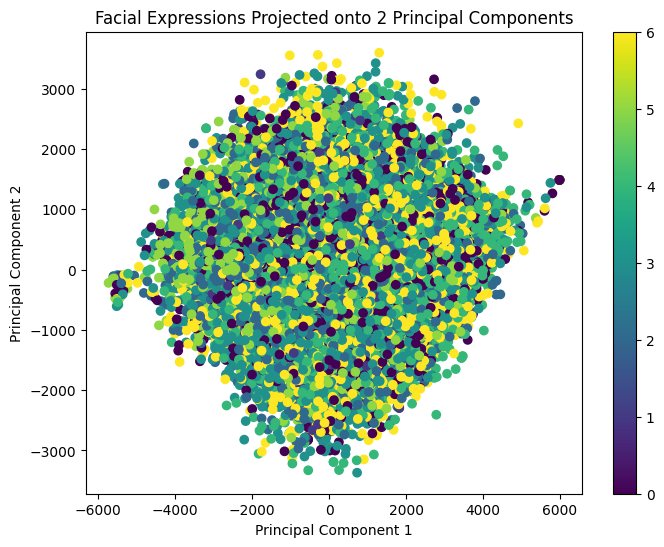

In [9]:
# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(images_pca[:, 0], images_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Facial Expressions Projected onto 2 Principal Components')
plt.colorbar()
plt.show()

Question 2: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)

In [10]:
##Nhập các thư viện cần thiết:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [11]:
##Khởi tạo đối tượng PCA và huấn luyện mô hình
pca_origin = PCA()
pca_origin.fit(images)

PCA()

In [12]:
##Lấy phương sai giải thích được của từng thành phần
explained_variance = pca_origin.explained_variance_

In [13]:
##Tính phương sai tích lũy
cumulative_explained_variance = np.cumsum(explained_variance / np.sum(explained_variance))

In [14]:
##Đặt ngưỡng phương sai tích lũy cần đạt
threshold = 0.95

In [15]:
##Tìm số lượng thành phần đáp ứng ngưỡng:
optimal_num_components = np.argmax(cumulative_explained_variance >= threshold) + 1

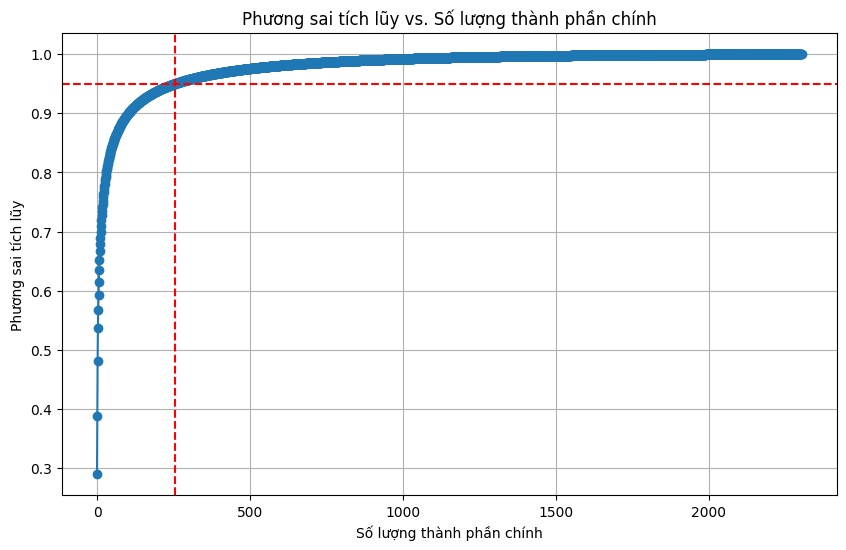

In [16]:
## Vẽ biểu đồ phương sai tích lũy
plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Số lượng thành phần chính')
plt.ylabel('Phương sai tích lũy')
plt.axhline(y=threshold, color='r', linestyle='--')
plt.axvline(x=optimal_num_components - 1, color='r', linestyle='--')
plt.title('Phương sai tích lũy vs. Số lượng thành phần chính')
plt.grid(True)
plt.show()

In [17]:
##thu nghiem tho
print(f'Số lượng thành phần chính tối ưu là {optimal_num_components}')

Số lượng thành phần chính tối ưu là 255
